<a href="https://colab.research.google.com/github/StinaFia/cv/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow ja mnist

Epoch tarkoittaa ajanjaksoa, jolloin koko datasarja kulkee eteen- ja taaksepäin neuroverkon läpi vain kerran. Epoch kuvaa sitä, kuinka monta kertaa algoritmi käy läpi koko datan.

Batch-koko on koulutusesimerkkien kokonaismäärä yhdessä eteen- ja taaksepäin kulkevassa vaiheessa. Batch-koko ja erien (batchien) määrä ovat kaksi eri asiaa. Mitä suurempi batch-koko on, sitä enemmän muistia tarvitaan. (https://www.linkedin.com/pulse/confusion-killer-epoch-vs-batch-size-iteration-sudip-kundu/)

In [ ]:
# importit ja mnist datan haku
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Katsotaan dataa

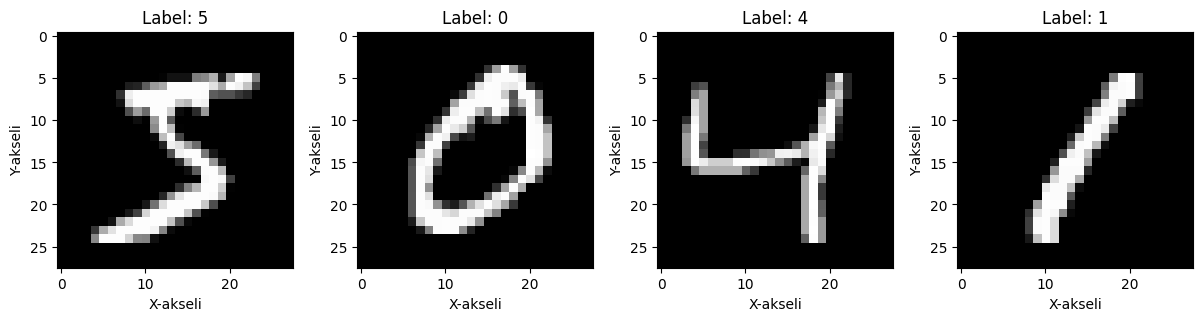

In [ ]:
# Luodaan kuva ja akselit, jossa on 1 rivi ja 4 saraketta
fig, axs = plt.subplots(1, 4, figsize=(12, 3), layout="constrained")

# Loopataan akselien yli ja piirretään dataa
for i, ax in enumerate(axs):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.set_xlabel('X-akseli')
    ax.set_ylabel('Y-akseli')

plt.show()

Validointijoukkoa käytetään mallin suorituskyvyn seurantaan koulutuksen aikana, mikä auttaa havaitsemaan ylisovittamisen.


https://medium.com/analytics-vidhya/training-neural-networks-for-dummies-04-pt-1-train-validate-test-split-9b1141496c63

In [ ]:
# Jaetaan data koulutus- ja testijoukkoihin (80% koulutukseen, 20% testaukseen)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

## Perinteisen neuroverkon kouluttaminen mnist-datalla

Malli: https://www.tensorflow.org

In [ ]:
# Datan normalisointi
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Neuroverkkomallin määrittely
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Neuroverkon summary
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Optimointialgoritmi, tappiofunktio ja metriikka
mdel.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
# Mallin tallennus muuttujaan
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8531 - loss: 0.5108 - val_accuracy: 0.9517 - val_loss: 0.1682
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9502 - loss: 0.1676 - val_accuracy: 0.9639 - val_loss: 0.1276
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9645 - loss: 0.1186 - val_accuracy: 0.9690 - val_loss: 0.1029
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9722 - loss: 0.0939 - val_accuracy: 0.9729 - val_loss: 0.0926
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0768 - val_accuracy: 0.9711 - val_loss: 0.0906
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9710 - loss: 0.0953


[0.09063586592674255, 0.9710833430290222]

## Graafin piirto, jossa esitetään ann (Artificial Neural Network) tarkkuuden kehitys (validointi ja koulutusdatalla) suhteessa epoch-numeroon.

```
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

+ ['loss'] ja ['val_loss']
```

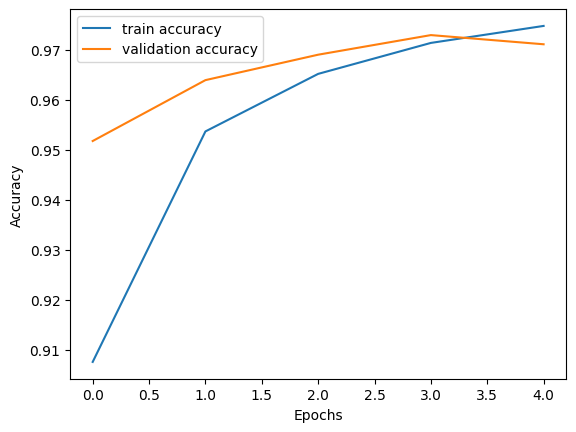

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

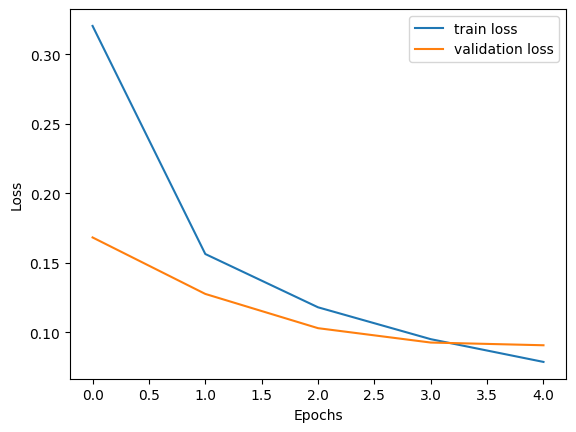

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Muutetaan kuvat oikeaan muotoon (28x28 pikseliä, 1 kanava)

Alkuperäiset kuvat ovat muodossa (lukumäärä, 28, 28), eli ilman kanavaulottuvuutta. Konvoluutiokerrokset odottavat syötteeksi dataa muodossa (lukumäärä, korkeus, leveys, kanavien lukumäärä). Lisätään kanavaulottuvuus (1), koska kuvat ovat harmaasävyisiä (vain yksi kanava). Muotoilun jälkeen data on valmis syötettäväksi konvoluutioneuroverkkoon.
https://www.tensorflow.org/tutorials/images/cnn

```
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
```

In [ ]:
# input_shape (28, 28, 1)
X_train = x_train.reshape(-1, 28, 28, 1)
#X_val = x_val.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)

## Konvoluutionallisen neuroverkon kouluttaminen mnist-datalla

In [ ]:
# Konvoluutionaalisen neuroverkkomallin määrittely
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Optimointialgoritmi, tappiofunktio ja metriikka
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Mallin tallennus muuttujaan
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.8799 - loss: 0.3814 - val_accuracy: 0.9706 - val_loss: 0.0895
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9827 - loss: 0.0550 - val_accuracy: 0.9833 - val_loss: 0.0563
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9860 - val_loss: 0.0483
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9889 - val_loss: 0.0414
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9887 - val_loss: 0.0365


## Piirrä graafi, joss esitetään cnn (Convolutional Neural Network) tarkkuuden kehitys (validointi ja koulutusdatalla) suhteessa epoch-numeroon.

```
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
```

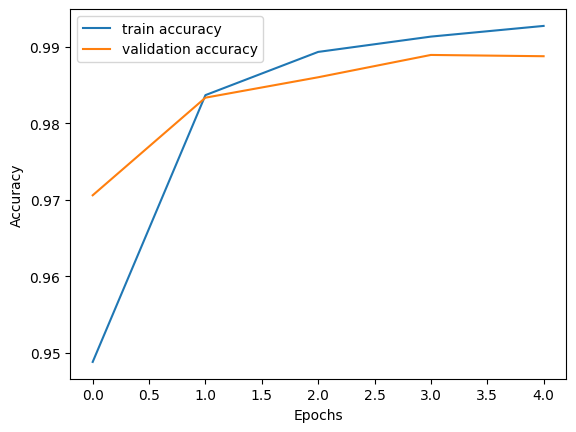

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Piirrä konvoluutionaalisen neuroverkon luokittelun tuloksista confusion matrix

Vaiheita:

 * Model predict
 * np.argmax(y_pred, axis=1) hakee ennusteista suurimman todennäköisyyden saaneen (https://numpy.org/devdocs/reference/generated/numpy.argmax.html)
 * Confusion matrixin scikit-learn -kirjastosta
 * Seaborn heatmap



In [ ]:
# Model predict -> ennustetaan testidatan luokat
y_pred = model.predict(x_test)

# Tämä koodi on generoitu tekoälyn (ChatGPT) avulla
# Tarkistettu numpy.argmax https://numpy.org/devdocs/reference/generated/numpy.argmax.html
# Tallennetaan muuttujaan suurimman todennäköisyyden luokka
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

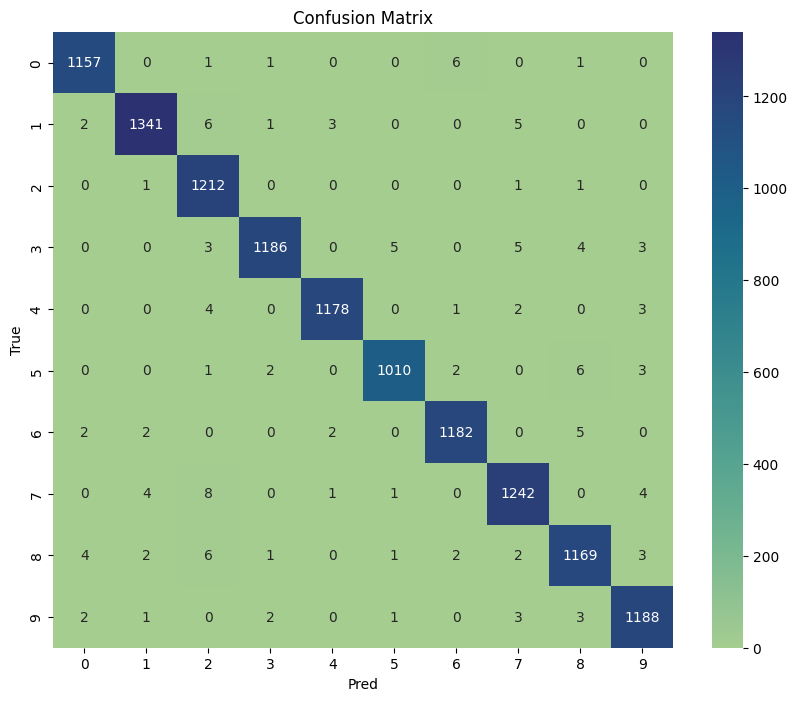

In [ ]:
# Heatmap
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

<h2>Konvoluutiomallin tulokset</h2>

Datasetistä saadaan ennustettua hyvinkin tarkasti ja malli ei tee monia virheitä. Kokeilin useita eri epoch arvon ja batch_sizen yhdistelmiä.

epochs=5 oli riittävä määrä käymään läpi koulutusdata. Isomalla epoch määrällä ei ollut merkittävää eroa tarkkuuteen.
batch_size=32 oli hyvän oloinen arvo. Suorittaminen oli riittävän nopeaa ja tarkkaa.

